## CMPE482 Numerical Linear Algebra, Spring 2016
### Assignment 4
### Ali Caner Turkmen

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.linalg as spla
from matplotlib import pyplot as pl

**Q9.3** Below, we form the matrix "HELLO", and give the spy image. 

In [2]:
A = ["0000000000000000000000000000000000000000",
"0110011000000000000000000000000000000000",
"0110011001111110000000000000000000000000",
"0110011001111110011000000000000000000000",
"0111111001100000011000000110000000000000",
"0111111001111110011000000110000001111110",
"0110011001111110011000000110000001111110",
"0110011001100000011000000110000001100110",
"0110011001111110011000000110000001100110",
"0000000001111110011111100110000001100110",
"0000000000000000011111100111111001100110",
"0000000000000000000000000111111001111110",
"0000000000000000000000000000000001111110",
"0000000000000000000000000000000000000000",
"0000000000000000000000000000000000000000"]

In [3]:
B = np.array([[int(x) for x in a] for a in A])

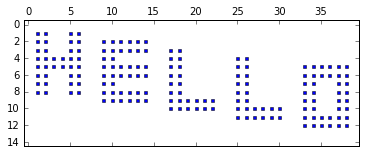

In [28]:
pl.spy(B, markersize=3)

Below, we use the numpy library to calculate the SVD of "HELLO". We take the singular values of the matrix and observe that although the exact rank should be 10, the number of nonnegative singular values is 12.

In [37]:
U,S,V = np.linalg.svd(B, full_matrices=False)

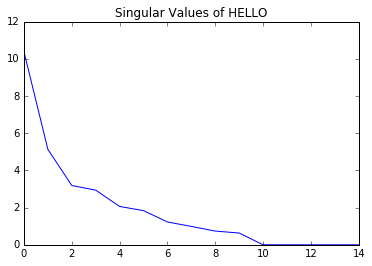

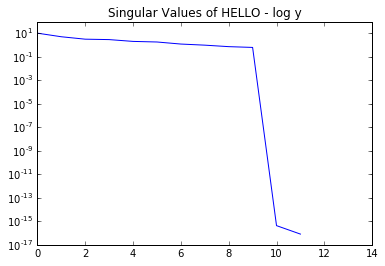

In [38]:
pl.title("Singular Values of HELLO")
pl.plot(S)
pl.show()

pl.title("Singular Values of HELLO - log y")
pl.semilogy(S)

In [39]:
print "Mathematically exact rank of HELLO is:", np.linalg.matrix_rank(B, tol=1e-10)
print "Mathematically exact rank of HELLO is:", np.linalg.matrix_rank(B, tol=1e-20)
print "Number of non-zero singular values is:", (S > 0.).sum()

Mathematically exact rank of HELLO is: 10
Mathematically exact rank of HELLO is: 12
Number of non-zero singular values is: 12


In [40]:
print U.shape
print S.shape
print V.shape

(15, 15)
(15,)
(15, 40)


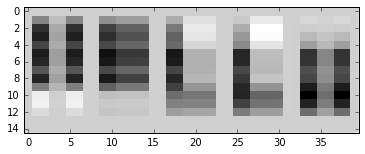

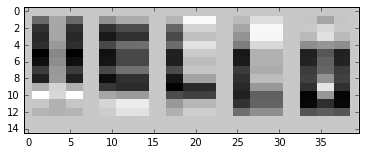

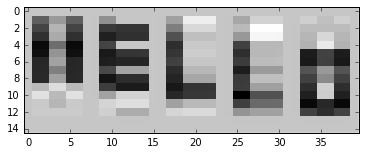

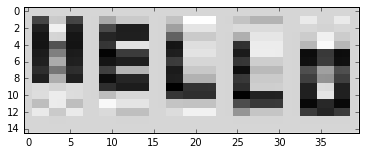

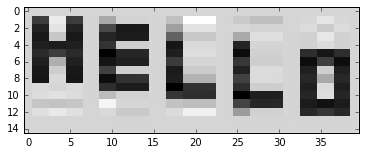

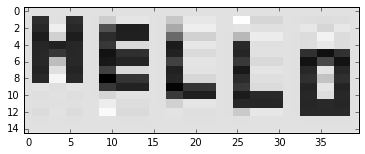

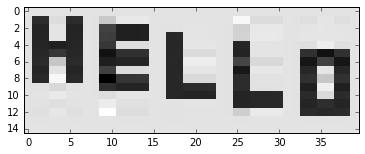

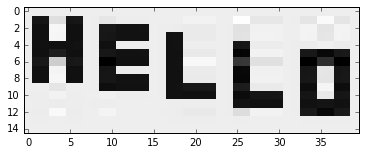

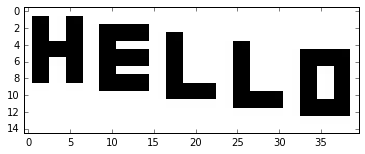

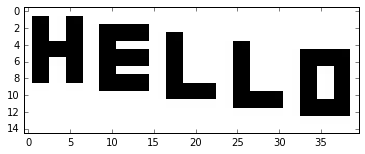

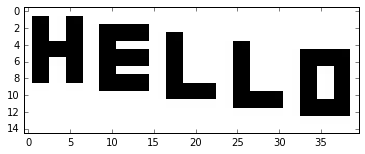

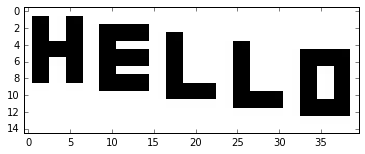

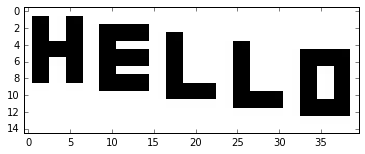

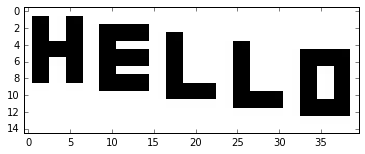

In [50]:
def tsvd(U, S, V, n):
    Rt = np.zeros((U.shape[0], V.shape[1]))
    for i in range(n):
        Rt += S[i] * np.outer(U.T[i], V[i])
    return Rt

for i in range(2, len(S)+1):
    pl.imshow(tsvd(U,S,V,i), cmap="gray_r", interpolation="none")
    pl.show()
    

**Q10.4** Below we show the difference between the Householder reflector and Givens rotation. We confirm that the Givens rotation is a clockwise rotation by angle $\theta$. Householder reflections, on the other hand, reflect across an axis, which is a $\theta$ clockwise rotation of the y-axis.

In [12]:
def house_F(theta):
    return np.array([[-np.cos(theta), np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def givens_J(theta):
    return np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

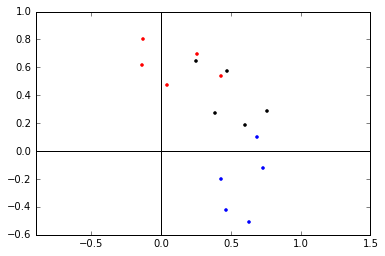

In [20]:
points = np.random.rand(2,5)
refx = house_F(np.pi/3).dot(points)
rotx = givens_J(np.pi/3).dot(points)

pl.plot(points[0,:], points[1,:], "k.")
pl.plot(refx[0,:], refx[1,:], "r.")
pl.plot(rotx[0,:], rotx[1,:], "b.")

pl.axhline(y=0, color='k')
pl.axvline(x=0, color='k')
pl.axis("equal")
pl.show()

part b - 

We describe the algorithm in natural language. For each column of the matrix $A$ to be decomposed, QR-factorization with Householder reflections zeroes out all but the necessary rows of each column, in order of increasing index. It does this by calculating the Householder transformation matrix for each column, for all but the first $i+1$ to $m$ rows, where $i$ is the column index and $m$ is the number of rows.

**Q11.3** We carry out the instructions in their numpy analogue below.

In [223]:
m= 50
n= 12
lsp = np.linspace(0, 1, m)
A = np.vander(lsp, n)
b = np.cos(4 * lsp)

We first implement the Householder and Modified Gram Schmidt routines, closely following the notation of Trefethen-Bau.

In [294]:
def ket(i, n):
    a = np.zeros(n)
    a[i] = 1
    return a

def mgs(A):
    M, N = A.shape
    V = np.zeros((M,N))
    R = np.zeros((N,N))
    Q = np.zeros((M,N))
    
    for i in range(N):
        V[:,i] = A[:,i]
    for i in range(N):
        R[i,i] = np.linalg.norm(V[:,i])
        Q[:,i] = V[:,i] / R[i,i]
        for j in range(i+1, N):
            R[i,j] = Q[:,i].dot(V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    
    return Q, R

def house(A):
    M, N = A.shape
    W = np.zeros((M,N))
    R = A.copy()
    
    for k in range(N):
        x = R[k:, k].ravel()
        s = np.sign(x[0])
        v = x
        v[0] = s*np.linalg.norm(x) + v[0]
        v /= np.linalg.norm(v)
        W[k:,k] = v
        R[k:, k:] = R[k:,k:] - 2 * np.outer(v, R[k:,k:].T.dot(v))
        
    #formQ
    Q = np.zeros((M,M))
    for j in range(M):
        e = ket(j,M)
        for k in range(N-1,-1,-1):
            e[k:] = e[k:] - 2*W[k:,k]*(W[k:,k].dot(e[k:]))
        Q[:,j] = e
        # Q[k:, j] = Q[k:,j] - 2*W[k:,k]*(W[k:,k].dot(Q[k:,j]))
    
    return Q, R, W

One by one, we solve the least squares problems below:

In [301]:
Q, R, _ = house(A)

In [302]:
Q[:, :12]

array([[ 1.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.   , ...,  0.063,  0.047, -0.049],
       [ 0.   , -0.   , -0.   , ..., -0.174, -0.061,  0.205],
       ..., 
       [ 0.   , -0.389, -0.018, ...,  0.627, -0.329,  0.057],
       [ 0.   , -0.481,  0.179, ..., -0.325,  0.607, -0.202],
       [ 0.   , -0.591,  0.458, ...,  0.047, -0.215,  0.08 ]])

In [298]:
from scipy.linalg import solve_triangular

# a - Naive normal equations 
w_naive = np.linalg.pinv(A.T.dot(A)).dot(A.T).dot(b)

# b - Modified Gram-Schmidt QR
Q, R = mgs(A)
w_mgs = solve_triangular(R, Q.T.dot(b))

# c - Householder QR
Q, R, _ = house(A)
w_house = np.linalg.lstsq(R, Q.T.dot(b))

# d - numpy QR
Q, R = np.linalg.qr(A)
w_qr = solve_triangular(R, Q.T.dot(b))

# e - numpy lstsq (equivalent to A\b in MATLAB-Octave)
w_lstsq = np.linalg.lstsq(A, b)

# f - numpy SVD
U, s, V = np.linalg.svd(A)
s = s[~np.isclose(s,0)]
rank = len(s)
z = U.T.dot(b)[:rank] / s
w_svd = V.T.dot(z)

Below we observe that the naive solution is wildly inaccurate, the Modified Gram-Schmidt routine is close but also inaccurate. Householder QR solution also seems to be unstable for reasons we cannot identify. 

In [300]:
print "Naive\n", w_naive
print "Modified Gram-Schmidt\n", w_mgs
print "Householder QR\n", w_house[0]
print "Numpy QR\n", w_qr
print "Numpy Lst Sq\n", w_lstsq[0]
print "Numpy SVD\n", w_svd

Naive
[  0.075  -0.304  -0.162   1.922  -0.267  -5.542  -0.051  10.677  -0.001
  -8.     -0.      1.   ]
Modified Gram-Schmidt
[  0.089  -0.38    0.02    1.675  -0.059  -5.656  -0.011  10.669  -0.     -8.
  -0.      1.   ]
Householder QR
[  0.      0.11   -1.145   3.243  -1.373  -4.947  -0.258  10.723  -0.007
  -8.     -0.      1.   ]
Numpy QR
[  0.088  -0.374   0.006   1.694  -0.075  -5.647  -0.014  10.669  -0.     -8.
  -0.      1.   ]
Numpy Lst Sq
[  0.088  -0.374   0.006   1.694  -0.075  -5.647  -0.014  10.669  -0.     -8.
  -0.      1.   ]
Numpy SVD
[  0.088  -0.374   0.006   1.694  -0.075  -5.647  -0.014  10.669  -0.     -8.
  -0.      1.   ]
